In [1]:
import csv
import collections
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from scipy.spatial import cKDTree as KDTree

In [2]:
#------------------------------------------------------------------------------
class GeocodeData:

    def __init__(self):
        coordinates, self.locations = self.extract()
        self.tree = KDTree(coordinates)
        self.load_countries()
  

    def load_countries(self):
        """Load a map of country code to name
        """
        self.countries = {}
        for code, name in csv.reader(open('./countries.csv')):
            self.countries[code] = name


    def query(self, coordinates):
        """Find closest match to this list of coordinates
        """
        try:
            distances, indices = self.tree.query(coordinates, k=1)
        except ValueError as e:
            print('Unable to parse coordinates: {}'.format(coordinates))
            raise e
        else:
            results = [self.locations[index] for index in indices]
            for result in results:
                result['country'] = self.countries.get(result['country_code'], '')
            return results


    def extract(self):
        """Extract geocode data 
        """

        rows = pd.read_csv('./geocode.csv')

        # load a list of known coordinates and corresponding locations
        coordinates, locations = [], []        
        
        for index, row in rows.iterrows():
            coordinates.append((row['Latitude'], row['Longitude']))
            locations.append(dict(country_code=row['CountryCode'], city=row['City']))
        return coordinates, locations
        
#------------------------------------------------------------------------------

In [3]:
def earthquakeFileRead():
    """Extract earthquakeFile data 
    """

    rows = pd.read_csv("earthquakes-23k.csv")

    # load a list of known coordinates and corresponding locations
    coordinates = []        
    
    for index, row in rows.iterrows():
        coordinates.append((row['Latitude'], row['Longitude']))
        
    return coordinates      

  
def get(coordinate):
    """Search for closest known location to this coordinate
    """
    gd = GeocodeData()
    return gd.query([coordinate])[0]

def search(coordinates):
    """Search for closest known locations to these coordinates
    """
    gd = GeocodeData()
    return gd.query(coordinates)

In [4]:
lat_long = earthquakeFileRead()

datas = search(lat_long)

uniqueData  = collections.Counter(e['country'] for e in datas)

#print number of earthquakes in all country between 1965 - 2016
print(uniqueData)

Counter({'Indonesia': 3080, 'Tonga': 2127, 'Japan': 1802, 'Papua New Guinea': 1559, 'Russian Federation': 1544, 'Chile': 1262, 'Vanuatu': 1016, 'United States': 982, 'Philippines': 900, 'Solomon Islands': 769, 'New Zealand': 533, 'South Georgia and the South Sandwich Islands': 532, 'Mexico': 520, 'Peru': 398, 'China': 357, 'Wallis and Futuna': 298, 'Australia': 288, 'Saint Helena': 282, 'Fiji': 254, 'Argentina': 237, 'Ecuador': 223, 'Pitcairn': 199, 'Taiwan': 198, 'New Caledonia': 194, 'India': 184, 'Iran, Islamic Republic of': 169, 'Afghanistan': 159, 'Greece': 151, 'Northern Mariana Islands': 150, 'Panama': 141, 'Brazil': 136, 'Guam': 127, 'Guatemala': 117, 'South Africa': 116, 'Turkey': 110, 'Colombia': 108, 'Nicaragua': 107, 'Kazakhstan': 107, 'Portugal': 96, 'Canada': 92, 'Pakistan': 89, 'Micronesia, Federated States of': 85, 'French Southern Territories': 84, 'Mauritius': 76, 'Maldives': 70, 'Costa Rica': 67, 'Antarctica': 67, 'El Salvador': 64, 'Yemen': 59, 'Myanmar': 55, 'Boliv

In [5]:
max_eq = max(uniqueData, key=uniqueData.get)
min_eq = min(uniqueData, key=uniqueData.get)

#print maximum and minimum number of earthquake in Countries
print(max_eq)
print(min_eq)

Indonesia
France


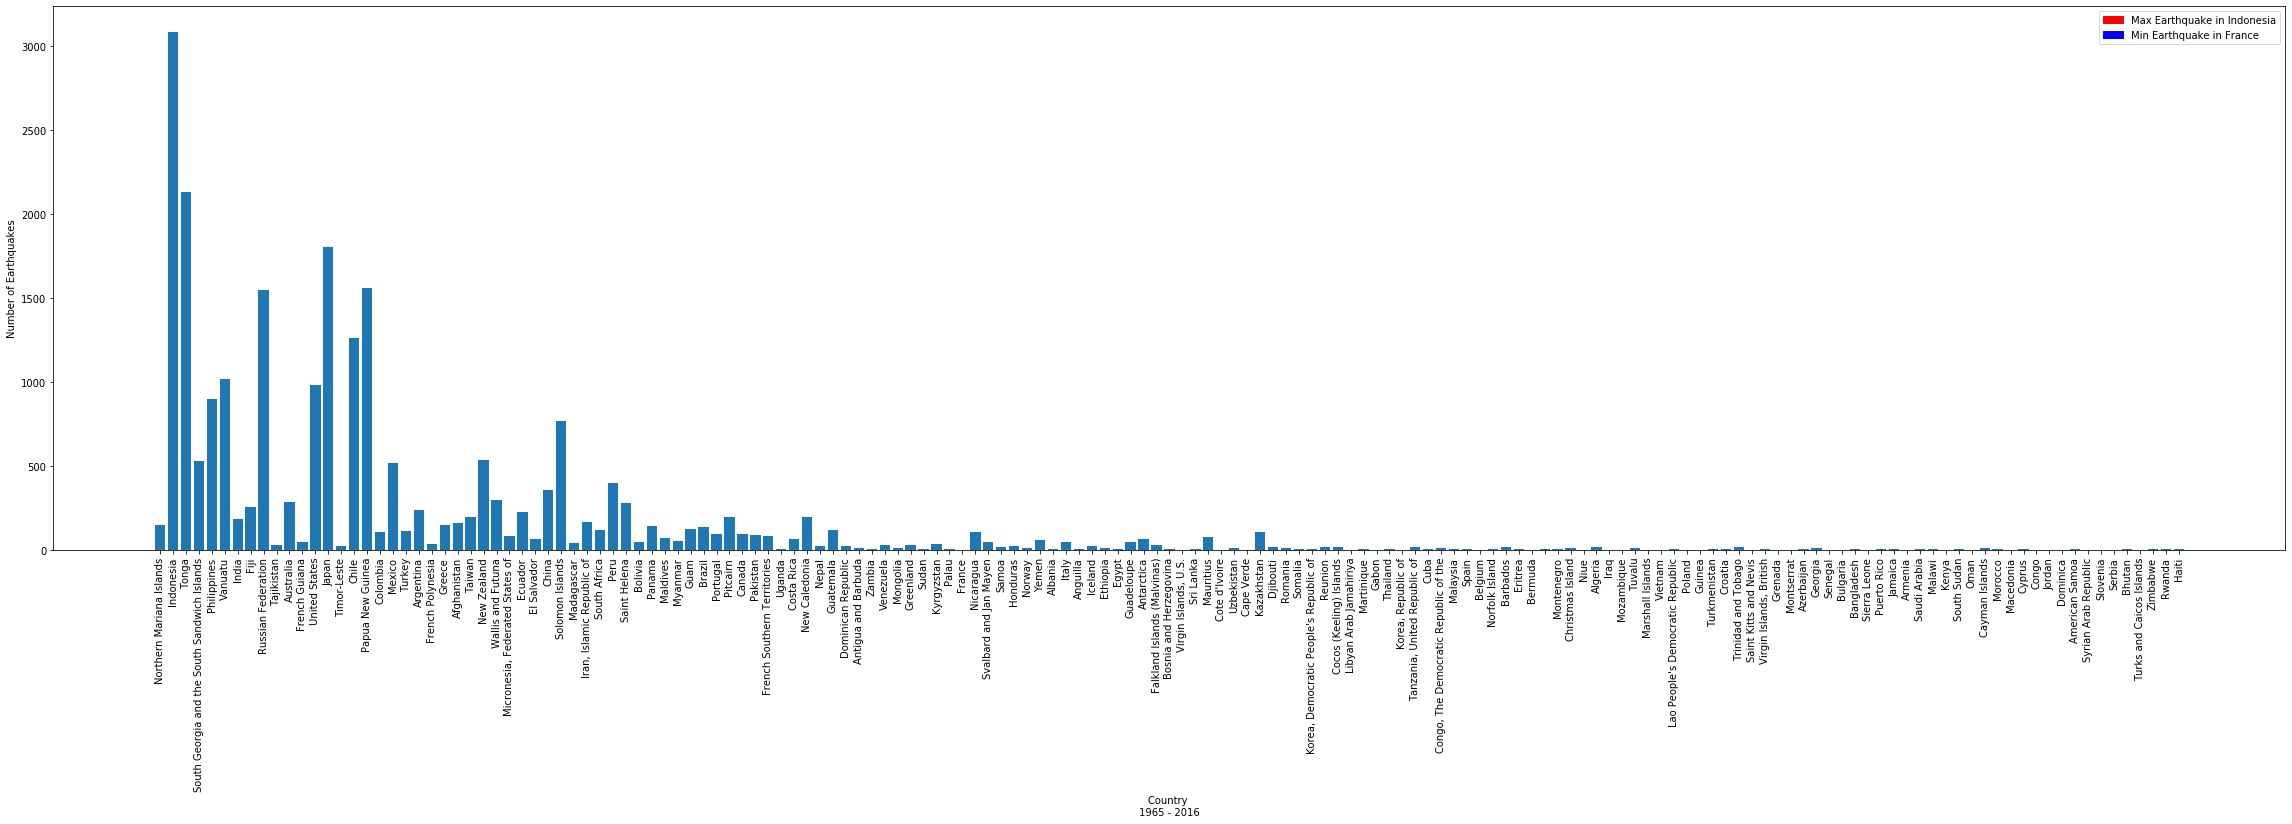

In [6]:
#Plot graph
f, ax = plt.subplots(figsize=(40,10))
plt.bar(range(len(uniqueData)), list(uniqueData.values()), align='center')
plt.xticks(range(len(uniqueData)), list(uniqueData.keys()), rotation=90)
plt.xlabel('Country \n1965 - 2016')
plt.ylabel('Number of Earthquakes')

red_patch = mpatches.Patch(color='red', label='Max Earthquake in '+max_eq)
blue_patch = mpatches.Patch(color='blue', label='Min Earthquake in '+min_eq)

plt.legend(handles=[red_patch, blue_patch])

plt.show()